<a href="https://colab.research.google.com/github/Sam-krish2411/DATA-SCIENCE-ASSIGNMENT/blob/main/MULTIPLE_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MULTIPLE LINEAR REGRESSION**

**INTRODUCTION**

We will follow these steps:
1. Perform **Exploratory Data Analysis (EDA)** to understand the dataset.
2. Preprocess the data (handling categorical variables, missing values, outliers).
3. Check for **multicollinearity** using VIF and correlation heatmap.
4. Build Multiple Linear Regression (MLR) models.
5. Evaluate the models using R², Adjusted R², RMSE, etc.
6. Apply **Lasso and Ridge regression** for regularization.
7. Interpret the results and provide insights.

This process will help us not only predict car prices but also understand which features are most important in determining the price.

In [1]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LOADING THE DATASET AND DISPLAYING THE FIRST 5 ROWS
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [2]:
#SHAPE OF THE DATASET
print("Dataset Shape:", df.shape)

#DATA TYPES AND MISSING VALUES
print("\nDataset Info:")
print(df.info())

#SUMMARY STATISTICS
print("\nSummary Statistics:")
print(df.describe().T)

Dataset Shape: (1436, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None

Summary Statistics:
            count          mean           std     min      25%      50%  \
Price      1436.0  10730.824513   3626.964585  4350.0   8450.0   9900.0   
Age_08_04  1436.0     55.947075     18.599988     1.0     44.0     61.0   
KM         1436.0  68533.259749  37506.44

**INFERANCES FROM THE SUMMARY STATISTICS**

**1. Price (Target Variable)**

      a. No missing values (1436 records).

      b. Mean = 10730, Median = 9900 → Mean > Median → right-skewed.

      c. High standard deviation (3626) → large variation in car prices.

      d. Min = 4350, Max = 32500 → very wide range.

      e. IQR = 1450 → Most cars priced between 8450 and 9900, but high-end cars (~30K) act as outliers.

**Inference:** Price distribution is right-skewed with high-value luxury car outliers.

**2. Age_08_04 (Car Age in Months)**

      a. Mean = 55.9 months (4.6 years), Median = 61 months (5 years).
         Distribution is slightly left-skewed.

      b. Min = 1 (nearly new), Max = 80 (~6.5 years).

      c. Most cars fall between 44 and 70 months old.

**Inference:** Dataset mainly consists of used cars, with few very new and old ones.

**3. KM (Mileage Driven)**

      a. Mean = 68,533 km, Median = 63,389 km → slightly right-skewed.

      b. Min = 1 km (unrealistic, possible data entry error). Max = 243,000 km → extremely high mileage cars exist.

      c. Very high spread (std = 37,506 km).

**Inference:** Mileage has huge variation. Outlier at min = 1 must be treated.

**4. HP (Horsepower)**

      a. Mean = 101.5 HP, Median = 110 HP → slightly left-skewed.

      b. Range = 69 – 192 HP → covers small cars to powerful models.

      c. Std dev = 14.9, so variation is not too extreme.

**Inference:** Most cars have horsepower between 90–110 HP.

**5. Automatic (Transmission Type)**

      a. Binary variable: 0 = Manual, 1 = Automatic. Mean = 0.0575 → Only ~5.7% cars are Automatic, rest are Manual.

**Inference:** Market is dominated by manual cars.

**6. CC (Engine Capacity)**

      a. Mean = 1576 cc, Median = 1600 cc → nearly symmetric.

      b. Range = 1300 – 16000 → but 16000 cc is unrealistic (outlier).

      c. Most cars are between 1400–1600 cc.

**Inference:** Extreme outlier at 16000 cc must be treated/removed.

**7. Doors**

      a. Mean = 4.03, Median = 4 → Most cars have 4 doors.

      b. Range = 2 – 5 doors → includes sports cars (2-door) and SUVs (5-door).

**Inference:** Majority cars are 4-door vehicles.

**8. Cylinders**

      a. Mean = 4, Median = 4.

      b. Min = 4, Max = 4 → no variation at all.

**Inference:** Drop this column (no predictive power).

**9. Gears**

      a. Mean = 5, Median = 5 → most cars have 5 gears.

      b. Very low spread (std = 0.18).

      c. Range = 3 – 6 gears.

**Inference:** Almost redundant, but minor variation exists.

**10. Weight**

      a. Mean = 1072 kg, Median = 1070 kg → symmetric.

      b. Range = 1000 – 1615 kg → cars mostly lightweight.

      c. Std dev = 52.6 → low variation.
**Inference:** Weight distribution is concentrated, may have low predictive power.

##**EXPLORATORY DATA ANALYSIS PROCESS**

**UNIVARIATE ANALYSIS**

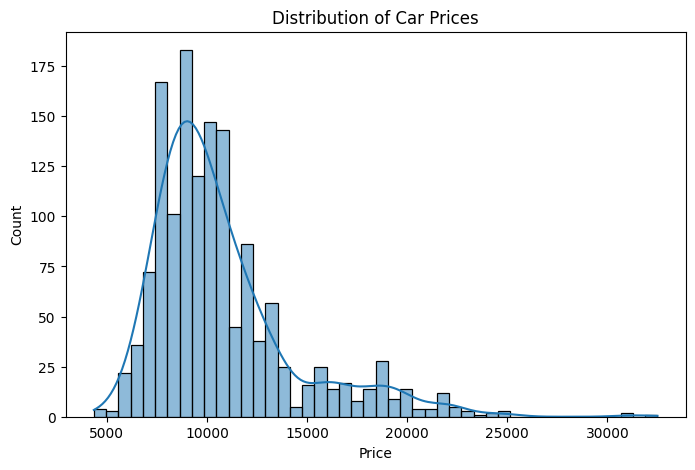

In [3]:
#HISTOGRAM OF PRICE COLUMN(DEPENDENT VARIABLE/TARGET VARIABLE)
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], kde=True)
plt.title("Distribution of Car Prices")
plt.show()



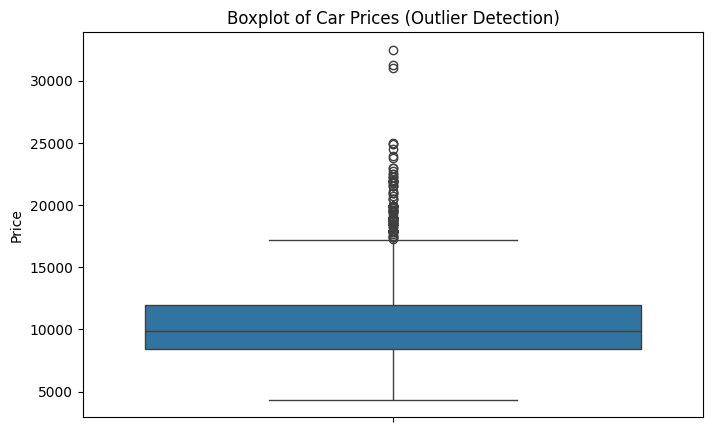

In [4]:
#BOXPLOT OF PRICE
plt.figure(figsize=(8,5))
sns.boxplot(df["Price"])
plt.title("Boxplot of Car Prices (Outlier Detection)")
plt.show()

**BIVARIATE ANALYSIS(DEPENDENT VARIABLE VS INDEPENDENT VARIABLE)**

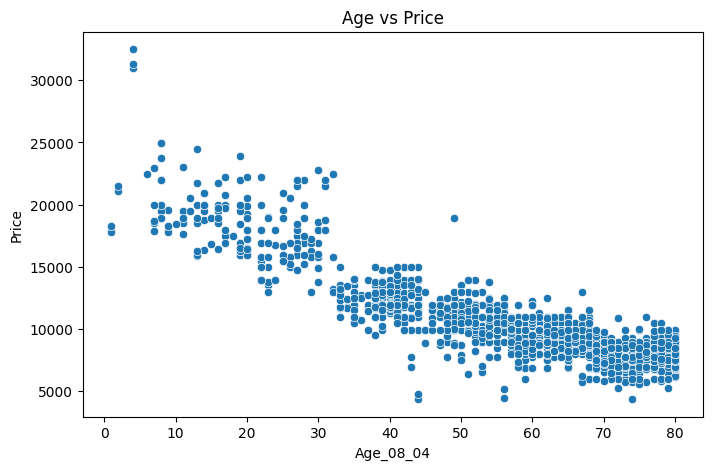

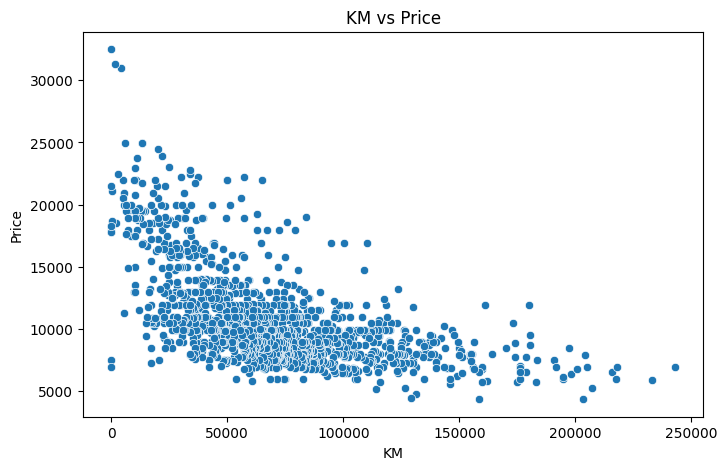

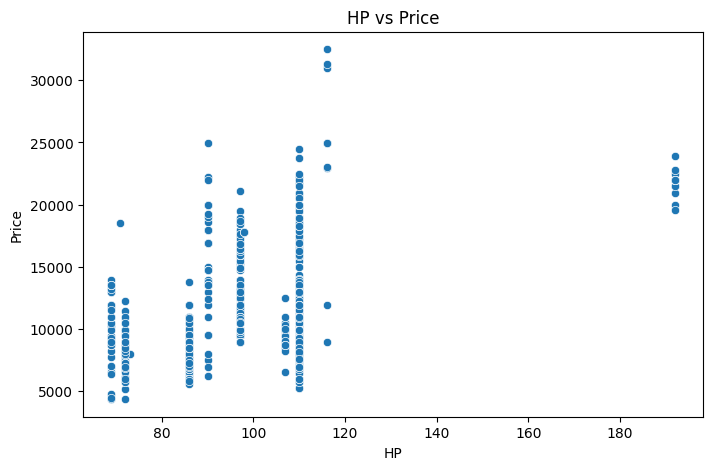

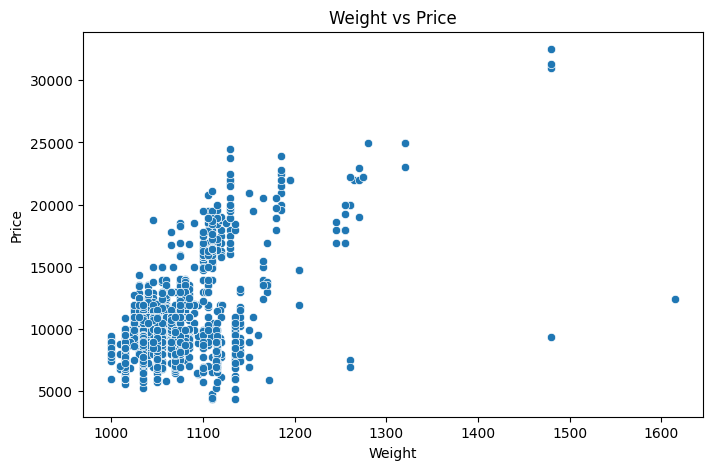

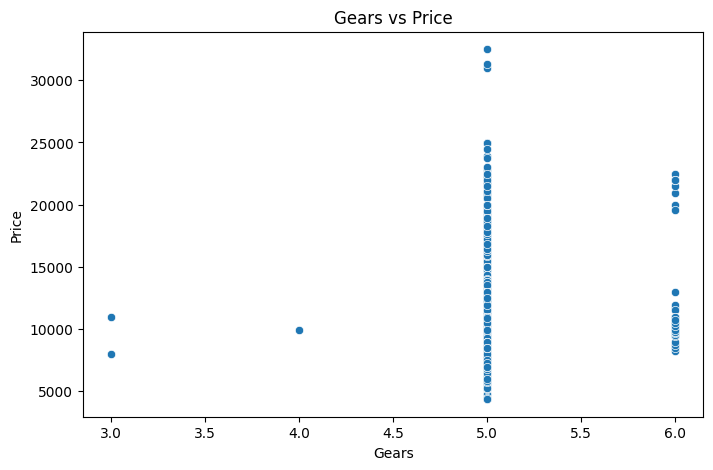

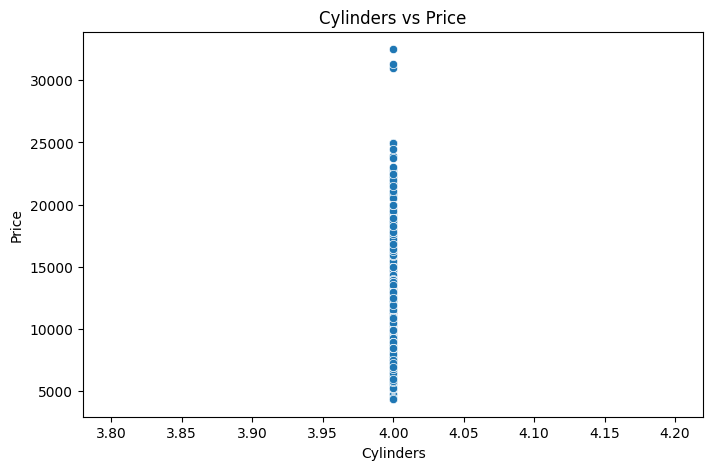

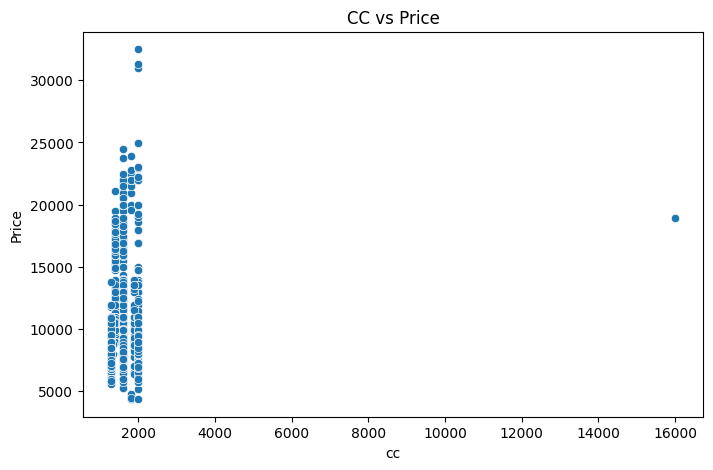

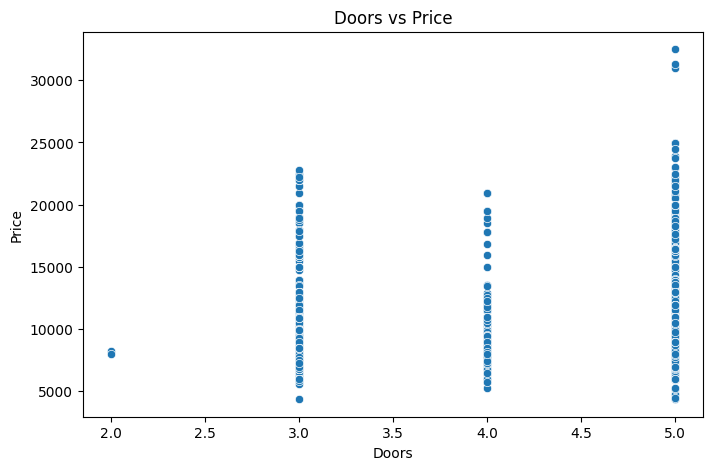

/tmp/ipython-input-388055883.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Price', data=df, palette='Set2')


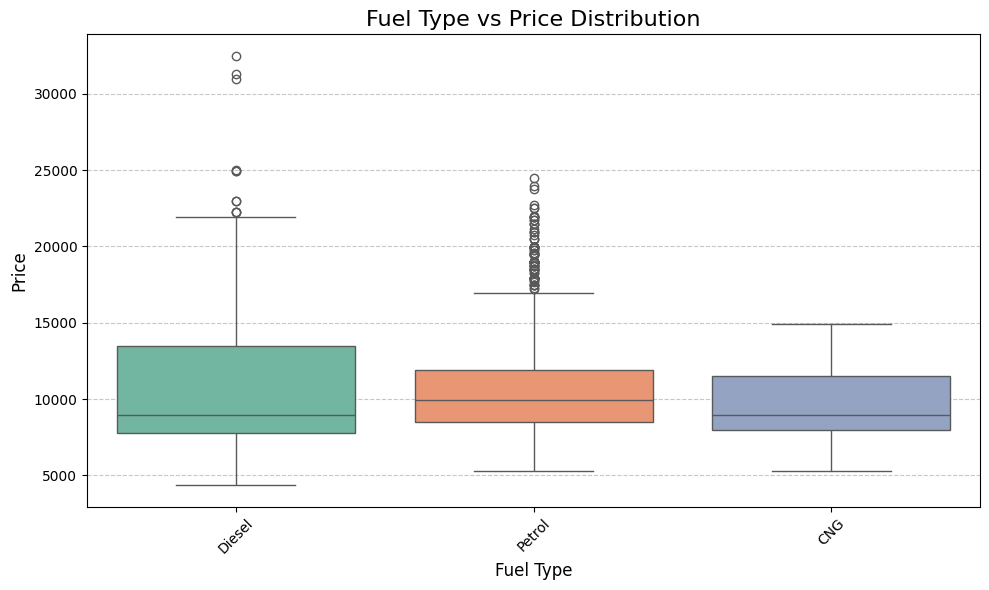

In [5]:
#Scatterplot: Age vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age_08_04", y="Price", data=df)
plt.title("Age vs Price")
plt.show()

# Scatterplot: KM vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x="KM", y="Price", data=df)
plt.title("KM vs Price")
plt.show()

#Scatterplot: HP vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x="HP", y="Price", data=df)
plt.title("HP vs Price")
plt.show()

#Scatterplot: Weight vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x="Weight", y="Price", data=df)
plt.title("Weight vs Price")
plt.show()

#Scatterplot: Gears vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x="Gears", y="Price", data=df)
plt.title("Gears vs Price")
plt.show()

#Scatterplot: Cylinders vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x="Cylinders", y="Price", data=df)
plt.title("Cylinders vs Price")
plt.show()

#Scatterplot: CC vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x="cc", y="Price", data=df)
plt.title("CC vs Price")
plt.show()

#Scatterplot: Doors vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x="Doors", y="Price", data=df)
plt.title("Doors vs Price")
plt.show()

#Boxplot: Fuel_Type vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df, palette='Set2')

plt.title('Fuel Type vs Price Distribution', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**INFERANCES**
1. Age vs Price
   
   a. Strong Negative Correlation - As age increases,price decreases

   b. Pattern follows linearity

   c. Strong Predictor of Price

2. KM vs Price
   
   a. Negative correlation - As KM increases,Price decreases

   b. Pattern follows linearity

   c. Strong Predictor of Price  

3. HP vs Price

   a. Slight positive correlation - As Hp increases,prices tends to rise

   b. Pattern follows linearity(mild to moderate)

   c. Moderate Predictor of Price

4. Weight vs Price

   a. Positive correlation

   b. Pattern follows linearity(moderate to strong)
  
   c. Moderate predictor of price

5. Cylinders vs price

   a. Vertical clustering with price varying widely within each group

   b. Pattern doesn't follow linearity

   c. Weak Predictor of Price

6. Gears vs Price
   
   a. Discrete Variable - shows vertical clustering
  
   b. Pattern doesn't follow linearity

   c. Weak Predictor of Price

7. Doors vs Price
   
   a. Vertical clusters - No visible upward or downward slope
   
   b. Pattern doesn't follow linearity

   c. Weak Predictor of Price

8. CC vs Price
   
   a. Non-uniform distribution - presence of an extreme outlier
  
   b. Pattern doesn't follow linearity

   c. Weak Predictor of Price

9. Fuel Type vs Price

   a. This distribution confirms that Fuel_Type is a valuable categorical predictor in the regression model.
   
   b. It was transformed using one-hot encoding to preserve its interpretive power while ensuring compatibility with linear modeling.

**ONE-HOT ENCODING USING BOTH PANDAS AND SKLEARN PREPROCESSING**


In [7]:
print(df.columns.tolist())

['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']


In [33]:
df_orig = pd.read_csv("ToyotaCorolla - MLR.csv")  # replace with your dataset file name

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')

fuel_encoded = ohe.fit_transform(df_orig[['Fuel_Type']])
fuel_dummies = pd.DataFrame(fuel_encoded.toarray(), columns=ohe.get_feature_names_out(['Fuel_Type']))

# Join with original df (dropping Fuel_Type)
df_sklearn = pd.concat([df_orig.drop('Fuel_Type', axis=1).reset_index(drop=True),
                        fuel_dummies.reset_index(drop=True)], axis=1)

# If you want df to become df_sklearn
df = df_sklearn.copy()
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1.0,0.0
1,13750,23,72937,90,0,2000,3,4,5,1165,1.0,0.0
2,13950,24,41711,90,0,2000,3,4,5,1165,1.0,0.0
3,14950,26,48000,90,0,2000,3,4,5,1165,1.0,0.0
4,13750,30,38500,90,0,2000,3,4,5,1170,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0.0,1.0
1432,10845,72,19000,86,0,1300,3,4,5,1015,0.0,1.0
1433,8500,71,17016,86,0,1300,3,4,5,1015,0.0,1.0
1434,7250,70,16916,86,0,1300,3,4,5,1015,0.0,1.0


**CHECKING FOR MULTICOLLINEARITY**

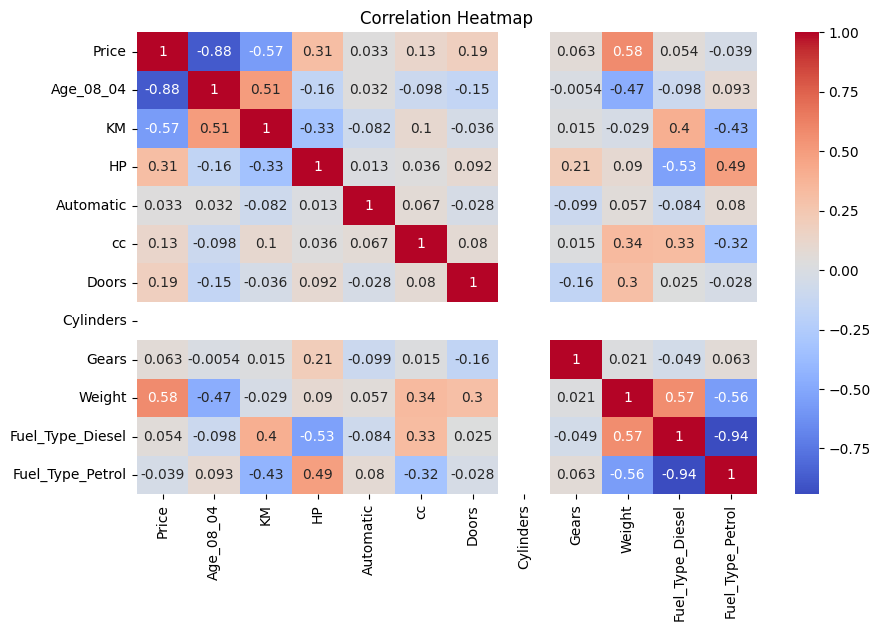

In [10]:
#CORRELATION MATRIX
corr_matrix = df.corr()

# CORRELATION HEATMAP
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**VARIANCE INFLATION FACTOR**

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Selecting numerical columns only
X = df.select_dtypes(include=[np.number]).drop("Price", axis=1)

# Add constant
X_const = add_constant(X)

# Calculate VIF for each column
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

vif

,Feature,VIF
0,Age_08_04,1.920520
1,KM,2.001790
2,HP,2.299766
3,Automatic,1.094550
4,cc,1.223892
5,Doors,1.217898
6,Cylinders,1877.037630
7,Gears,1.117413
8,Weight,3.297145
9,Fuel_Type_Diesel,11.317251


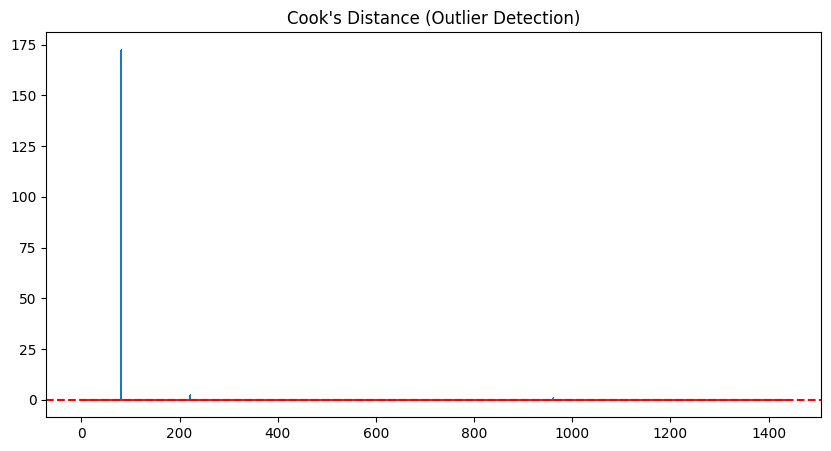

In [13]:
import statsmodels.api as sm

# Define X, y
X = df.drop("Price", axis=1).select_dtypes(include=[np.number])
y = df["Price"]

# Add constant
X_const = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X_const).fit()

# Cook's Distance
influence = model.get_influence()
cooks = influence.cooks_distance[0]

# Plot Cook's Distance
plt.figure(figsize=(10,5))
plt.stem(np.arange(len(cooks)), cooks, markerfmt=",")
plt.axhline(4/len(X), color="red", linestyle="--")
plt.title("Cook's Distance (Outlier Detection)")
plt.show()

**DROPPING UNWANTED COLUMNS**

In [32]:
# Drop the unwanted columns
df=pd.read_csv("ToyotaCorolla - MLR.csv")
df = df.drop(['Cylinders', 'Automatic', 'Doors', 'Gears', 'cc'], axis=1)

# Check the updated dataframe
print("Remaining columns:", df.columns.tolist())
df.head()

Remaining columns: ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Weight']


,Price,Age_08_04,KM,Fuel_Type,HP,Weight
0,13500,23,46986,Diesel,90,1165
1,13750,23,72937,Diesel,90,1165
2,13950,24,41711,Diesel,90,1165
3,14950,26,48000,Diesel,90,1165
4,13750,30,38500,Diesel,90,1170


**CALCULATING VARIANCE INFLATION FACTOR**

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Selecting numerical columns only
X = df.select_dtypes(include=[np.number]).drop("Price", axis=1)

# Add constant
X_const = add_constant(X)

# Calculate VIF for each column
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

vif

,Feature,VIF
0,const,690.024421
1,Age_08_04,1.873690
2,KM,1.614165
3,HP,1.139033
4,Weight,1.405564


**STANDARDISING THE VARIABLES**

In [35]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Price'])
y = df['Price']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**SPLITTING THE DATA INTO TRAINING AND TESTING**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**FITTING THE MLR MODEL INTO THE DATA**

In [41]:
#MODEL-1 (All the Features)
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
y_pred1 = lr1.predict(X_test)

print("\nModel 1 (All Features)")
print("R² Score:", r2_score(y_test, y_pred1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))
print("MAE:", mean_absolute_error(y_test, y_pred1))

#MODEL-2 (Removing AGE column)
X2 = df.drop(columns=['Price','Age_08_04'])
y2 = df['Price']

X2_scaled = scaler.fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)

lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)
y_pred2 = lr2.predict(X2_test)

print("\nModel 2 (Dropped Age_08_04)")
print("R² Score:", r2_score(y2_test, y_pred2))
print("RMSE:", np.sqrt(mean_squared_error(y2_test, y_pred2)))
print("MAE:", mean_absolute_error(y2_test, y_pred2))


#MODEL-3 (Removing WEIGHT column)
X3 = df[['KM','HP']]
y3 = df['Price']

X3_scaled = scaler.fit_transform(X3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, test_size=0.2, random_state=42)
lr3 = LinearRegression()
lr3.fit(X3_train, y3_train)
y_pred3 = lr3.predict(X3_test)


print("\nModel 3 (Features: KM, HP - Without Weight)")
print("R² Score:", r2_score(y3_test, y_pred3))
print("RMSE:", np.sqrt(mean_squared_error(y3_test, y_pred3)))
print("MAE:", mean_absolute_error(y3_test, y_pred3))


coefficients = pd.DataFrame({
    "Feature": X3.columns,
    "Coefficient": lr3.coef_
})
print("\nModel 3 Coefficients:\n", coefficients)


Model 1 (All Features)
R² Score: 0.834888804061108
RMSE: 1484.2654153296521
MAE: 990.8872739193968

Model 2 (Dropped Age_08_04)
R² Score: 0.5659798847486797
RMSE: 2406.457718663986
MAE: 1553.098988679414

Model 3 (Features: KM, HP - Without Weight)
R² Score: 0.3612764084387524
RMSE: 2919.3071115750295
MAE: 2142.645592268521

Model 3 Coefficients:
   Feature  Coefficient
0      KM -1892.902071
1      HP   458.408163


#**INTERPRETATIONS**

Model 1 (All Features)

a. Best fit (R² ≈ 0.83).

b. Coefficients are most reliable.

Model 2 (Dropped Age)

a. Performance worsens (R² ≈ 0.56).

b. Coefficients of KM, HP, etc., shift because the model is missing a key variable (Age).

Model 3 (KM + HP)

a. Weakest model (R² ≈ 0.36).

b. Coefficients are intuitive but explain much less of price variation.

In [42]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_lasso = lasso.predict(X_test)

print("\nLasso Regression")
print("R² Score:", r2_score(y_test, y_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_lasso)))


Lasso Regression
R² Score: 0.8349119754675463
RMSE: 1484.1612621141912


In [43]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test)

print("\nRidge Regression")
print("R² Score:", r2_score(y_test, y_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_ridge)))



Ridge Regression
R² Score: 0.8350658145414687
RMSE: 1483.4695850205794


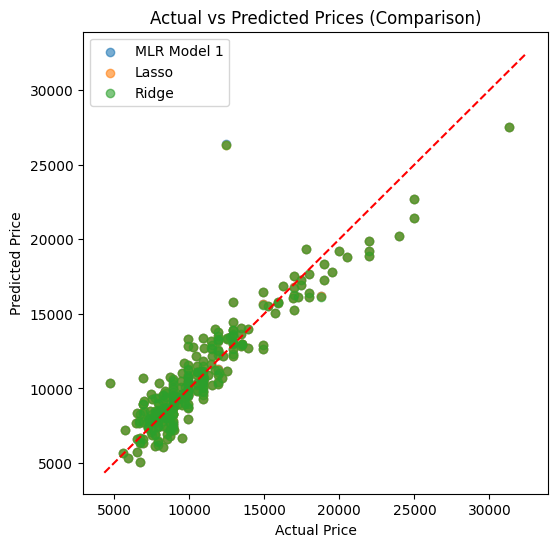

In [40]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred1, alpha=0.6, label="MLR Model 1")
plt.scatter(y_test, y_lasso, alpha=0.6, label="Lasso")
plt.scatter(y_test, y_ridge, alpha=0.6, label="Ridge")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.title("Actual vs Predicted Prices (Comparison)")
plt.show()

#**CONCLUSION**

The scatterplot comparing actual vs predicted prices across three regression models — Multiple Linear Regression (MLR), Lasso, and Ridge — reveals the following:

• 	MLR Model 1 shows the closest alignment to the ideal prediction line (red dashed), indicating high accuracy and minimal bias.

• 	Lasso Regression performs slightly worse, with more deviation from the diagonal, suggesting that regularization may have pruned some useful features.

• 	Ridge Regression offers a middle ground, balancing complexity and generalization, but still trails behind MLR in precision.

Overall, MLR Model 1 remains the most reliable predictor for this dataset, capturing the price dynamics with greater fidelity. Regularized models may be preferred in high-dimensional or noisy scenarios, but here, the full-feature model delivers superior performance.